# Анализ убытков приложения ProcrastinatePRO+

### 1. Обзор данных

Загрузка данных о визитах, заказах и расходах в переменные. Оптимизация данных для анализа. Проверка, что тип данных в каждом столбце — правильный.

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [4]:
visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),  # данные о визитах
    pd.read_csv('orders_info_short.csv'),  # заказы
    pd.read_csv('costs_info_short.csv'),  # траты на рекламу
)
events = None  # других событий нет

<b>Структура visits_info_short.csv:</b>

User Id — уникальный идентификатор пользователя,

Region — страна пользователя,

Device — тип устройства пользователя,

Channel — идентификатор источника перехода,

Session Start — дата и время начала сессии,

Session End — дата и время окончания сессии.

<b>Структура orders_info_short.csv:</b>

User Id — уникальный идентификатор пользователя,

Event Dt — дата и время покупки,

Revenue — сумма заказа.

<b>Структура costs_info_short.csv:</b>

dt — дата проведения рекламной кампании,

Channel — идентификатор рекламного источника,

costs — расходы на эту кампанию.

In [5]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [9]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [13]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Выводы:
- Строчные буквы сочетаются с прописными.
- Встречаются пробелы.
- Несколько слов следует записывать "змеиным_регистром"
Также необходимо изменить тип данных в столбцах с датой для всех таблиц в DateTime для удобства при проведении анализа.

## 2. Предобработка данных

### Стиль заголовков

In [17]:
visits.columns = visits.columns.str.lower()# переводим название столбцов в нижний регистр 
visits =visits.rename(columns={'user id':'user_id','session start':'session_start','session end':'session_end'})
#Переименуем столбцы для удобства дальнейшей работы. Проверим результат.
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [18]:
orders.columns = orders.columns.str.lower()# переводим название столбцов в нижний регистр 
orders =orders.rename(columns={'user id':'user_id','event dt':'event_dt'})
#Переименуем столбцы для удобства дальнейшей работы. Проверим результат.
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [19]:
costs.columns = costs.columns.str.lower()# переводим название столбцов в нижний регистр 
costs = costs.rename(columns={'Channel':'channel'})
#Переименуем столбцы для удобства дальнейшей работы. Проверим результат.
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

### Преобразование данных о времени

с помощью метода info() в таблице visits проверили какие типы данные в каждом столбце и выяснили, что необходимо изменить тип данных в двух столбцах: Session Start, Session End

In [20]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

в таблице orders проверили какие типы данные в каждом столбце и выяснили, что необходимо изменить тип данных в Event Dt

In [21]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

В таблице costs проверили какие типы данные в каждом столбце и выяснили, что необходимо изменить тип данных в dt

In [22]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

### Дубликаты

In [23]:
visits.duplicated().sum()

0

In [24]:
orders.duplicated().sum()

0

In [25]:
costs.duplicated().sum()

0

После изучения данных и выполнения предобработки выявлено: 
- отсутсвие пропусков и дубликатов
- с помощью метода info() в таблице visits проверили какие типы данные в каждом столбце и изменили типы данных

## 3. Функции для расчета и анализа LTV, ROI, удержания и конверсии

### Функции для расчета и анализа

In [26]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [27]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [28]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [29]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [30]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [31]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [32]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [33]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функции LTV, ROI, удержания(retention), конверсии(conversion) заданы

## 4. Исследовательский анализ данных

Построение профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.

Необходимо выяснить:

Из каких стран приходят посетители? 

Какие страны дают больше всего платящих пользователей?

Какими устройствами они пользуются? 

С каких устройств чаще всего заходят платящие пользователи?

По каким рекламным каналам шло привлечение пользователей? 

Какие каналы приносят больше всего платящих пользователей?

In [34]:
#Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках, событиях и тратах приложения Procrastinate Pro+.
profiles = get_profiles(visits, orders, events, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [35]:
# доступный интервал привлечения пользователей
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print(min_date)
print(max_date)

2019-05-01
2019-10-27


Минимальная дата привлечения пользователей - 1 мая 2019 года.

Максимальная дата привлечения пользователей - 27 октября 2019 года.

С учетом того что исследование проводится 1 ноября 2019 года, интервал подходит для дальнейшего анализа.

In [36]:
# Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
visits.head(5)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [37]:
# Таблица, отражающая количество пользователей и долю платящих из каждой страны.
region_payer = pd.DataFrame()
region_payer['users_count'] = profiles.groupby('region')['user_id'].count()
region_payer['payer_users_count'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payer['share'] = 100*(region_payer['payer_users_count'] / region_payer['users_count'])
region_payer.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_count,payer_users_count,share
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


Больше всего платящих пользователей приходится на United States

In [38]:
#Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
# Таблица отражающая количество пользователей и долю платящих для каждого устройства.
device_payer = pd.DataFrame()
device_payer['users_count'] = profiles.groupby('device')['user_id'].count()
device_payer['payer_users_count'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer['share'] = 100*(device_payer['payer_users_count'] / device_payer['users_count'])
device_payer.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_count,payer_users_count,share
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


Большинство платящих пользователей предпочитают IPhone(6.2%) и Mac(6.4%). Также клиенты пользуются PC и Android

In [39]:
# Рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. 
# Таблица отражающая количество пользователей и долю платящих для каждого канала привлечения.
channel_payer = pd.DataFrame()
channel_payer['users_count'] = profiles.groupby('channel')['user_id'].count()
channel_payer['payer_users_count'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_payer['share'] = 100*(channel_payer['payer_users_count'] / channel_payer['users_count']) 
channel_payer.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_count,payer_users_count,share
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


Больше всего платящих пользователей пришло из каналов: FaceBoom,AdNonSense, lambdaMediaAds,  TipTop

При анализе данных за 6 месяцев активности аудитории выявлено, что Американский рынок имеет большое воздействие на мировой. Рассматривая во всех направлениях, данного исследования: среди техники используемой, самих пользователей, и источников

**Вывод:**

**По странам**

Наибольшее число пользователей приходит из США (100002) и составляют наибольшую долю платящих пользователей (6.90%), на втором месте по доле платящих пользователей (4.11%) находится Германия, не смотря на то, что по количеству пользователей, пришедших в приложение, эта страна занимает четвертое место (14981).
Доля платящих пользователей для Англии составляет - 3.98% при количестве пользователей - 17575, а для Франции эти показатели 3.80% и 17450, соответственно.

**По устройствам**

Наибольшее число пользователей используют iPhone (54479) при этом доля платящих пользователей составляет 6.21%, на первом месте по доле платящих пользователей (6.36%) находится Mac, не смотря на то, что по количеству пользователей, это устройство занимает четвертое место (30042).
Доля платящих пользователей Android составляет - 5.85% при количестве пользователей - 35032, а для PC эти показатели 5.05% и 30455, соответственно.

**По источникам привлечения**

На первом месте по доле платящих пользователей (12.20%) находится FaceBoom, по количеству пользователей, этот рекламный канал занимает первое место (29144), без учета organic (естественный приток пользователей без затрат на рекламу).
Каналы AdNonSense и lambdaMediaAds привлекают не так много пользователей (3880 и 2149, соответственно), как например самый дорогой канал TipTop (19561), но доля платящих пользователей для AdNonSense и lambdaMediaAds (11.34% и 10.47%, соответственно) выше чем для TipTop (9.60%).
Остальные каналы привлекают от 4000 до 8000 пользователей, а доля платящих пользователей составляет от 2.71% до 7.91%.

### 5. Маркетинг

- Посчитать общую сумму расходов на маркетинг.
- Как траты распределены по рекламным источникам.
- Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Рассчитать сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [40]:
#Посчитаем общую сумму расходов на маркетинг.
costs['costs'].sum().round()

105497.0

Общая сумма расходов на маркетинг: 105497

In [41]:
# Как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
channel_costs = pd.DataFrame()
channel_costs['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs.sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего было потрачено на маркетинг в каналах TipTop и FaceBoom

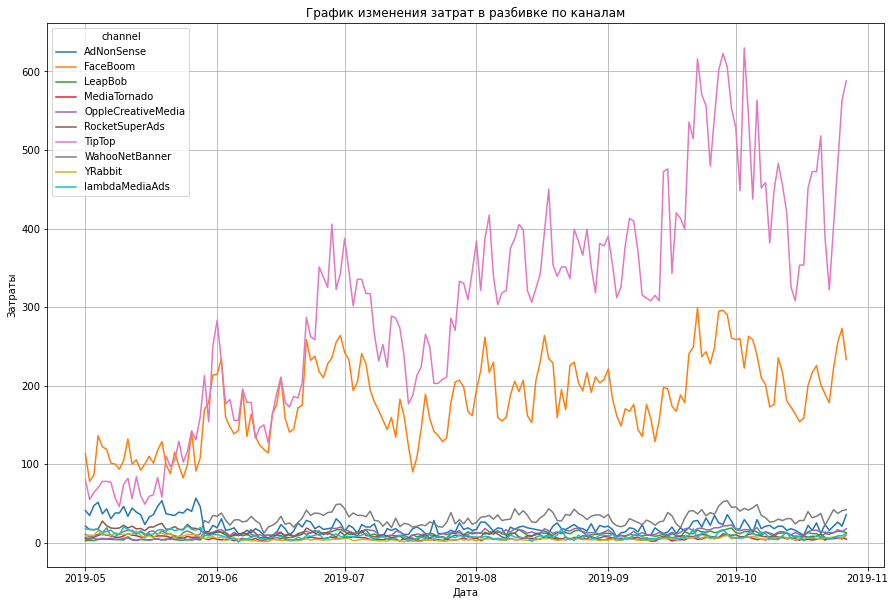

In [42]:
#Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
channel_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
channel_data.plot(                                             
           figsize=(15, 10),
           grid=True,)

plt.title('График изменения затрат в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Затраты на маркетинг со временем возрастали только на двух каналах: TipTop и FaceBoom

In [43]:
# Сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 
cac_by_channel = pd.DataFrame()
# уберём органических пользователей:
profiles = profiles.query('channel != "organic"')
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.1f}'})


,acquisition_cost_mean
channel,
TipTop,2.8
FaceBoom,1.1
AdNonSense,1.0
lambdaMediaAds,0.7
WahooNetBanner,0.6
RocketSuperAds,0.4
OppleCreativeMedia,0.2
YRabbit,0.2
MediaTornado,0.2


Самыми дорогими трафиками вышли TipTop (2.8), FaceBoom (1.1), AdNonSense(1.0).

Выводы:
Слишком большие расходы на трафик TipTop, ведь большое количество пользователей использует FaceBoom
На каналах LeapBob, MediaTornado, YRabbit, OppleCreativeMedia привлечение пользователей обходится дешевле всего

### Шаг 6. Оценка окупаемости рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализировать общую окупаемость рекламы;
- Проанализировать окупаемость рекламы с разбивкой по устройствам;
- Проанализировать окупаемость рекламы с разбивкой по странам;
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам.

Описание обнаруженных проблем. Ответы на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Описание возможных причин обнаруженных проблем и формулировка рекомендаций для рекламного отдела. При решении этого шага, учитывается, данные рассматриваются с 1-го ноября 2019 года и что в организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [44]:
# Анализ окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

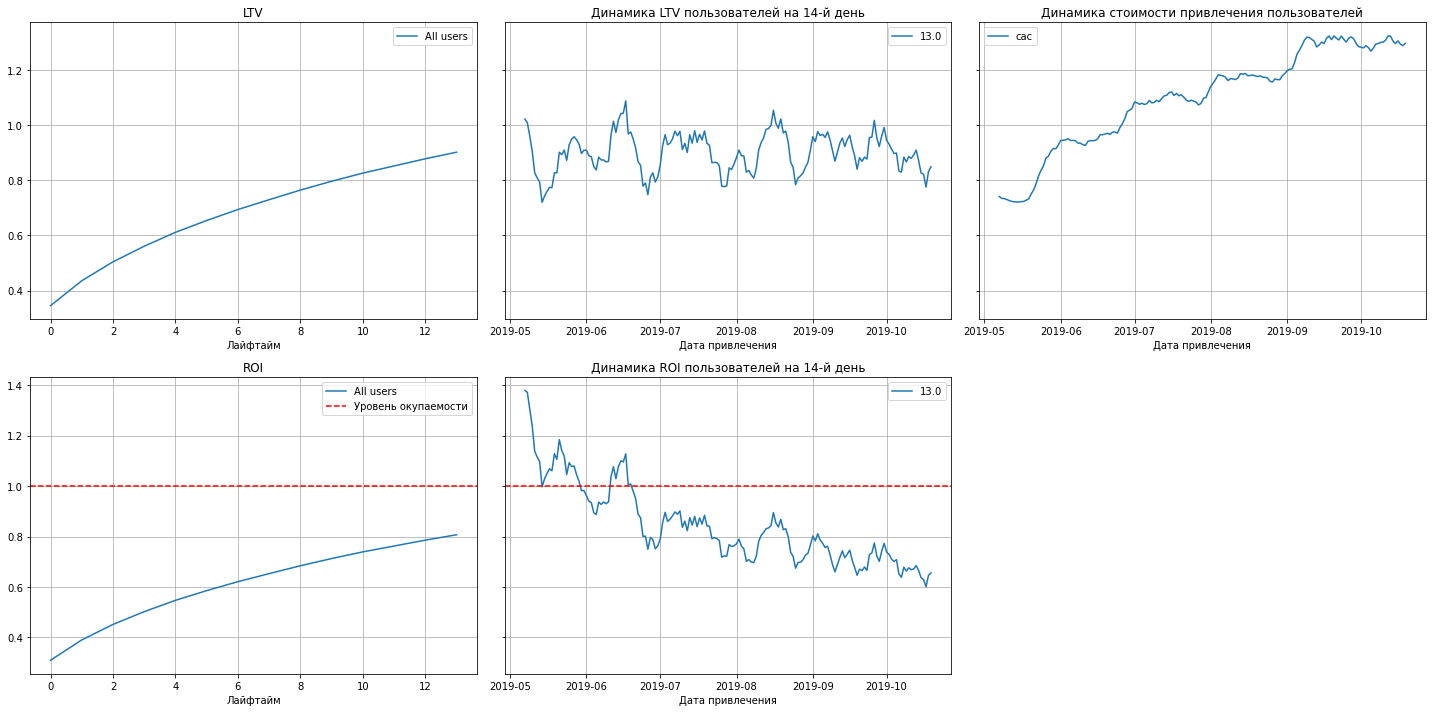

In [45]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI в конце недели — чуть выше 80%.
- CAC на протяжении всего эксперимента растёт
- LTV держится на примерно одном уровне на протяжении всего эксперимента. Значит, дело не в ухудшении качества пользователей.
- Пользователи перестают окупаться уже в июне

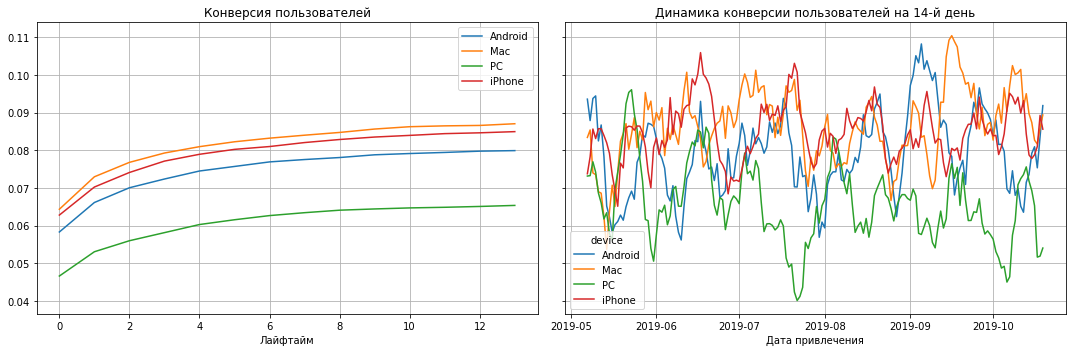

In [46]:
#Проверим конверсию пользователей и динамику её изменения. То же самое сделайем с удержанием пользователей. 
dimensions = ['device']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Судя по графикам, пользователи Mac конвертируются очень хорошо, причём постоянно. Видимо, дело в удержании.Большие просадки по конверсии у пользователей PC и Android

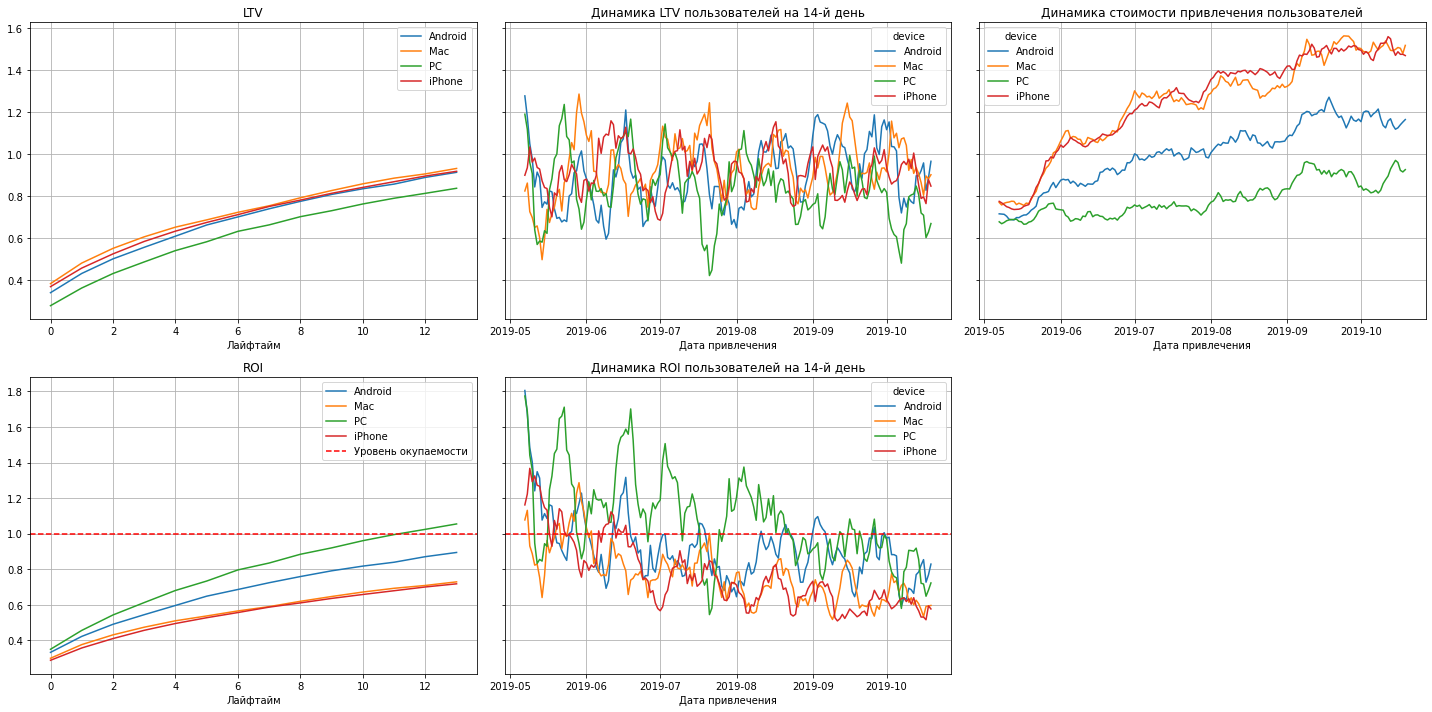

In [47]:
#Проанализирем окупаемость рекламы с разбивкой по устройствам. 
#Постройм графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Пользователи PC стабильно окупаются, а вот владельцы iPhone, Android и iPad - нет

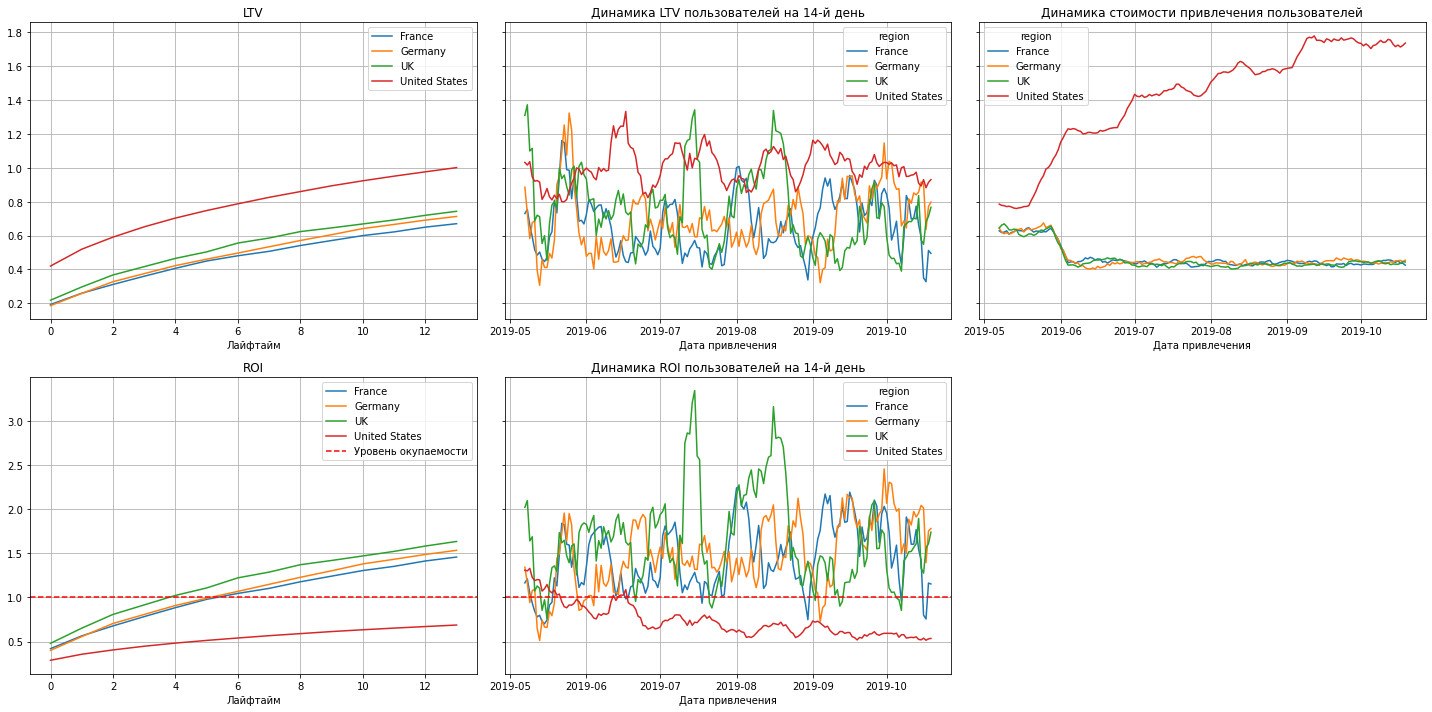

In [48]:
#Проанализируем окупаемость рекламы с разбивкой по странам. 
#Постройм графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
# смотрим окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Пользователи из США стабильно плохо удерживаются. Для платящих пользователей из США удержание 14-го дня ниже, чем для остальных стран, примерно на 5%. Скорее всего, причина в какой-нибудь технической проблеме

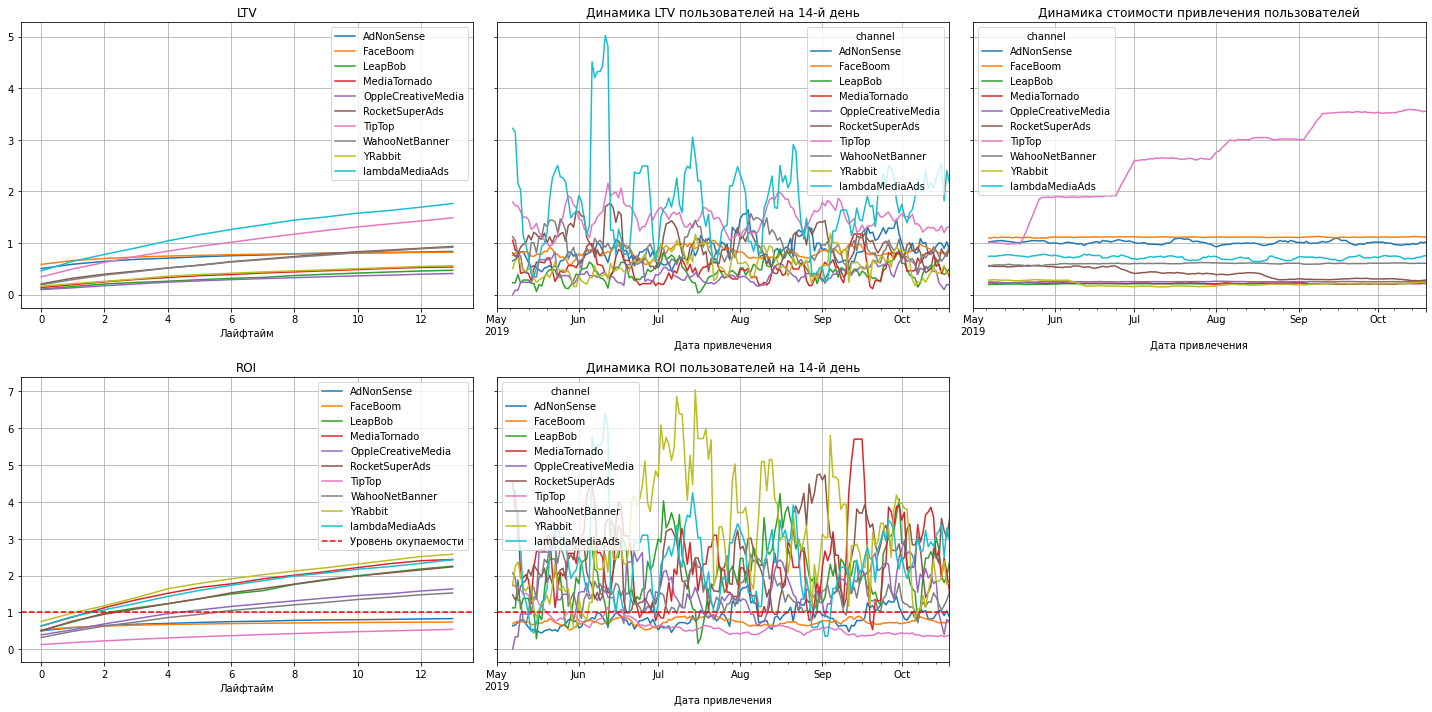

In [40]:
#Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. 
#Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
# смотрим окупаемость с разбивкой по источникам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Динамика стоимости привлечения пользователей растёт только у TipTop
Не окупаются к концу 2 недели пользователи из каналов: TipTop, FaceBoom, AdNonSense. Если каналы убыточны, дело не в источниках привлечения

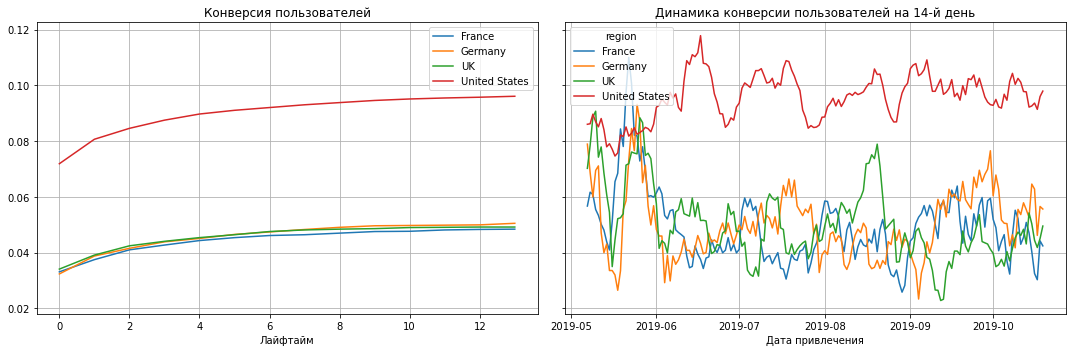

In [49]:
dimensions = ['region']
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей из США в 2 раза больше , чем в других странах

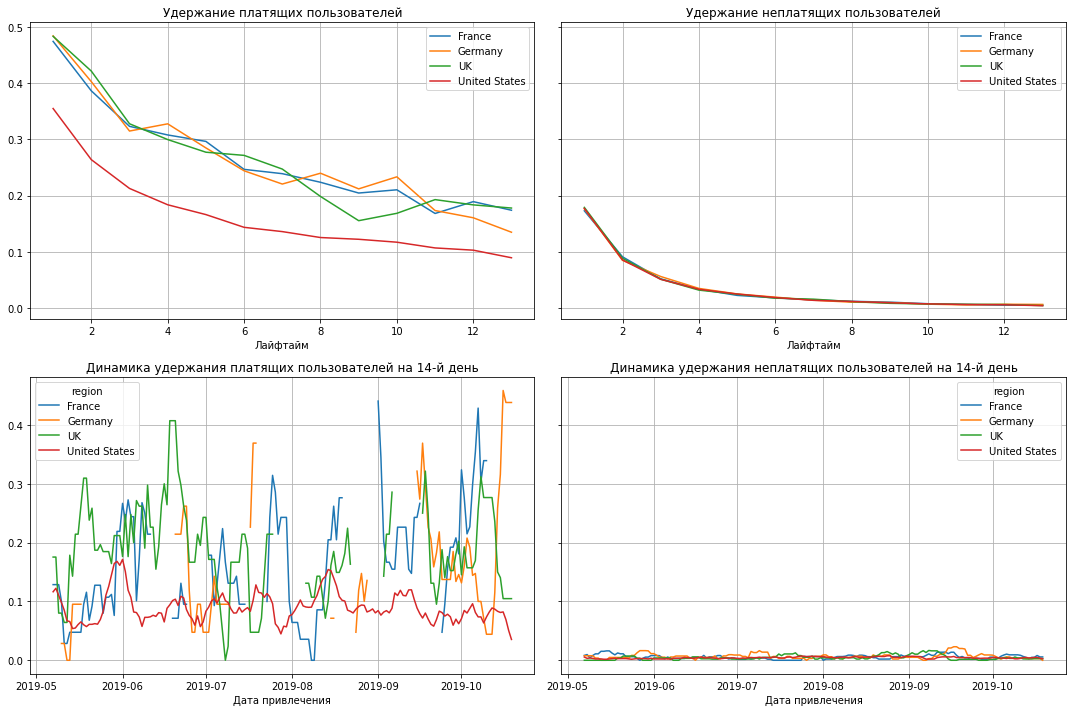

In [50]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Действительно, пользователи из США стабильно плохо удерживаются. Для платящих пользователей из США удержание 14-го дня ниже, чем у остальных  стран.
Скорее всего, причина в какой-нибудь технической проблеме.

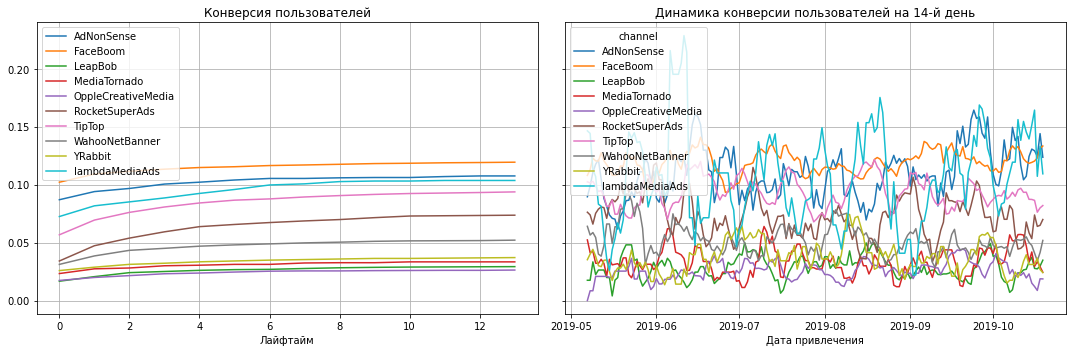

In [52]:
dimensions = ['channel']
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

В динамике конверсии пользователей из разных каналов наблюдается сезонность, например lambdaMediaAds	

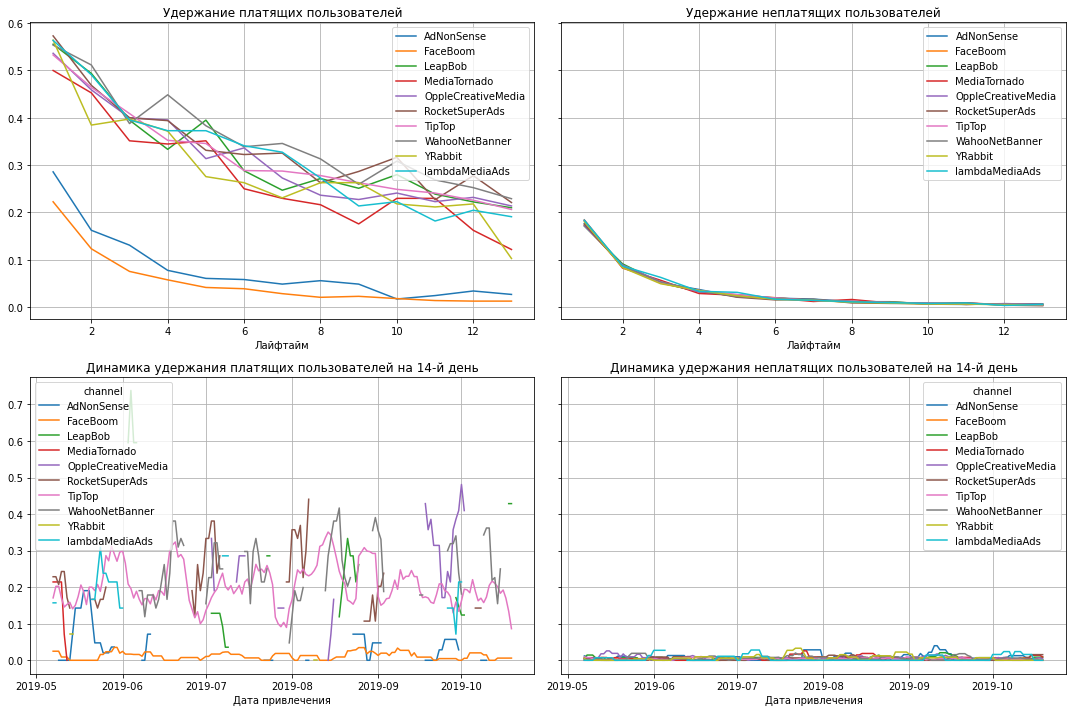

In [53]:
dimensions = ['channel']
# смотрим удержание с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей на каналах FaceBoom, AdNonSense на очень низком уровне. Эти каналы являются самыми дорогими трафиками  FaceBoom (1.1), AdNonSense(1.0).

Выводы:
- Реклама направленная на привлечение пользователей не окупается к концу второй недели. 
- Из стран USA снижает окупаемость рекламы. Из каналов: TipTop, FaceBoom, AdNonSense. Хуже всего удерживаются платящие пользователи устройств IPhone и MAC
- Проблемы с окупаемостью вызваны неправильным распределением средств на привлечение с каналов
- TipTop самый невыгодный канал для привлечения, с которого большинство пользователей из страны USA. 
- FaceBoom приводит платящих пользователей с низким качеством, они быстро уходят.
- Также стоит обратить внимание на каналы откуда привлекаются платящие пользователи PC, потому что они удерживаются лучше всего

### 6. Общий вывод

Каналы инвестиции, которые не окупились: TipTop, FaceBoom, AdNonSense. LTV пользователей из США самый высокий, но затраты на рекламу не окупаются. ROI по странам в динамике показал, что с каждым месяцем привлеченные платящие пользователи из США показывает "отрицательный рост», но динамика стоимости привлечения этих пользователей увеличивалась до сентября.

Конверсия пользователей FaceBoom высокая, но удержание платящих пользователей низкое. Видимо качество платного контента не устраивало пользователей, хотя канал имеет лидирующую позицию

Причины, неэффективности привлечения пользователей из США:

- Скорее всего, причина в технической проблеме. Возможно есть проблема с оптимизацией приложения Procrastinate Pro+ для ios устройств (это ведущая платформа для США)

- Не стоит вкладывать большое количество средств в рекламную систему TipTop, она неэффективна. Предполагаем, что данная сеть, популярна в других странах

Рекомендации для отдела маркетинга.
- Стоит обратить внимание на каналы откуда привлекаются платящие пользователи PC, потому что они удерживаются лучше всего
- Самый высокий LTV у канала lambdaMediaAds. Нужно увеличить ROI, с помощью более дешового канала привлечения для этих пользователей
- Обратить внимание на другие страны и начать искать новые каналы для привлечения пользователей

Платящим пользователям явно нравится продукт, можно попробовать найти подешевле канал привлечения для этих пользователей, чтобы увеличить 
Нужно искать новые каналы для привлечения пользователей из стран: UK и Germany
Привлекать больше PC и Android пользователей.
Стоит обратить внимание на 3 недооценённых канала с наивысшим ROI: Yrabbit, MediaTornado, lambdaMediaAds

